<a href="https://colab.research.google.com/github/Andre-1970/Machine_learning_classical_algorithms_Sem4/blob/main/7_Homework_8_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [5]:
import numpy as np

clust = np.array([
    [-0.5972191612445694, -0.5919098916910581],
    [-1.5838020751869848, 0.4743393635868491],
    [-1.892642118066139, -1.2770390481464395],
    [-1.021761443519372, -0.38446059106320013],
    [-0.628271339507516, -2.308149346281125],
    [-0.7180915776856387, 1.1805550909358404],
    [-1.543143767548152, -1.4163791359687334],
    [0.022103701018375554, -1.1279478858865397],
    [-0.7776518874305778, -0.4157532453316538],
    [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])


def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


total_distance = 0

for point in clust:
    total_distance += euclidean_distance(point, centroid)

print(f"Суммарное расстояние от каждой точки до центра кластера: {total_distance}")

Суммарное расстояние от каждой точки до центра кластера: 11.440582444503534


### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

/home/andrey/___project/python/Machine_learning_classical_algorithms_Sem4/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


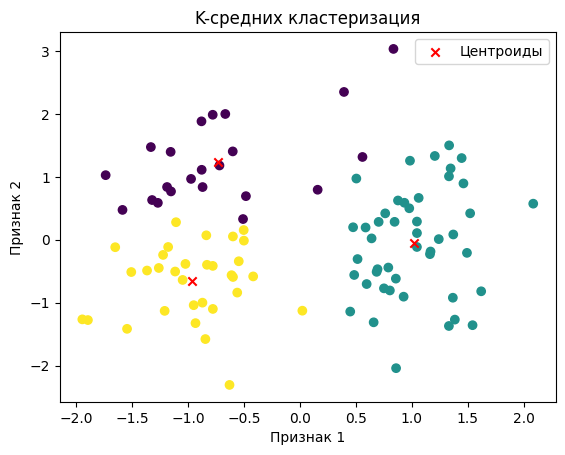

In [14]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

with open('data/clustering.pkl', 'rb') as f:
    file_data = pickle.load(f)

data = file_data['X']

# Обучение алгоритма k-средних
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(data)

plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', label='Центроиды')
plt.title('K-средних кластеризация')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

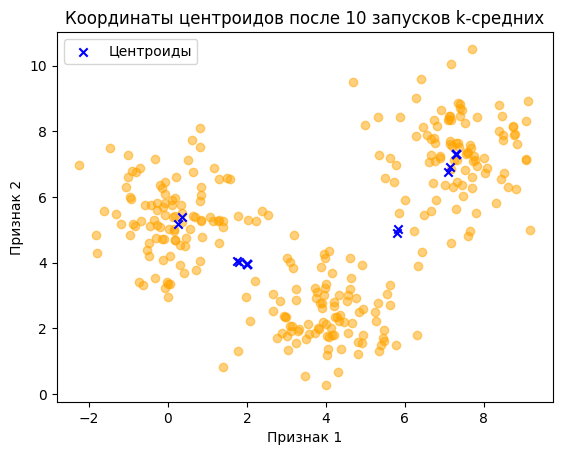

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

data = []

with open('data/clustering_hw.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    next(csvreader)  # Пропускаем заголовок столбца
    for row in csvreader:
        data.append([float(row[0]), float(row[1])])

data = np.array(data)

centroid_points = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for _ in range(10):
        kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
        kmeans_model.fit(data)
        centroids = kmeans_model.cluster_centers_
        centroid_points.extend(centroids)

centroid_points = np.array(centroid_points)

plt.scatter(data[:, 0], data[:, 1], c='orange', alpha=0.5)
plt.scatter(centroid_points[:, 0], centroid_points[:, 1], c='blue', marker='x', label='Центроиды')
plt.title('Координаты центроидов после 10 запусков k-средних')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.
